## Generative models

In short, generative models belong to a class of statistical models that are capable of generating new instances based on a dataset. Typically, these models are utilized in unsupervised learning.

Formally, we can think of a dataset as a sequence of instances $x_1, x_2, ..., x_n$ from a data probability distribution $p(x)$. In the example image below, the blue region represents the part of the image space that contains real images with a high probability (above some threshold), while the black dots indicate our data points (each representing an image in our dataset).

<div style="text-align:center;">
    <img src="./images/gm.png" alt="Example Image" style="width:600px;">
</div>
We can define our generative model as a probability distribution with $\theta$ parameters, denoted as $\hat p_{\theta}(x)$. It's important to note that we define this distribution using points from a Gaussian unit. Therefore, we need to find $\theta$ parameters that satisfy our requirements: generating new data $x'$ consistently.

In this context, we will be creating various generative models and exploring both experimentation and theory. Let's begin by discussing the first architecture that we will be constructing.

### Autoencoders

This architecture is very important to us, because autoencoders are a base for some popular generative models. Autoencoders have power to compress data and reconstruct data. Basicaly, this is very interesting because, first application can be compress data and you can spend less memory for any application (yay!). But autoencoder can be much more! Let's check this out and see architecture below:

<!-- ![Example Image](./imgs/autoencoder_architecture.png) -->
<div style="text-align:center;">
    <img src="./images/autoencoder_architecture.png" alt="Example Image" style="width:600px;">
</div>

In here, we can see architecture and loss function that we must to use. This loss is called by "Reconstruction Loss", because when system minimizes this, we can to turn output aproximates by input. 

$$\text{Reconstruction Loss} = \text{MSE}(x, \hat x)$$

Before we in fact construct some generative architecture, lets build an autoencoder and check some theory subjects! Spoiler: You will learn about **latent space** (Latent space is a little bit abstact, think about him like a something in Matrix)

### 1) Import dependencies

In [1]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lets check your GPU
if tf.config.list_logical_devices('GPU') != []:
    print("LET'S DO THISS!!! :DDDD")
else: 
    print("Oh dude... D:")

LET'S DO THISS!!! :DDDD


In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "generative"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2) Load Dataset (MNIST)

We will use MNIST dataset. 

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
def plot_grid_images(images):
    n_images = len(images)
    fig = plt.figure(figsize=(n_images * 1.5, 2))
    for img_idx in range(n_images):
        plt.subplot(2, n_images, 1 + img_idx)
        plot_image(images[img_idx])

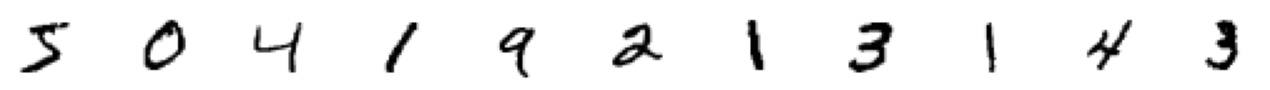

In [6]:
plot_grid_images(X_train_full[:11])

In [7]:
# Preprocessing data
X_train_full, X_test = X_train_full.astype(np.float32) / 255, X_test.astype(np.float32) / 255
X_train, X_val = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]

### 3) Build Architecture using Keras

In [8]:
encoder = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(30, activation='relu')
])

decoder = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(28 * 28),
    keras.layers.Reshape([28, 28])
])

In [9]:
autoencoder = keras.Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer='adam')
history = autoencoder.fit(
    X_train, X_train,
    validation_data=(X_val, X_val),
    epochs=20
)

Epoch 1/20
1719/1719 [==============================] - 6s 2ms/step - loss: 0.0289 - val_loss: 0.0235
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0221 - val_loss: 0.0208
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0205 - val_loss: 0.0198
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0196 - val_loss: 0.0192
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0191 - val_loss: 0.0188
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0186 - val_loss: 0.0183
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0183 - val_loss: 0.0179
Epoch 8/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0177 - val_loss: 0.0173
Epoch 9/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 10/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.017

In [10]:
def show_reconstructions(model, n_images=10):
    reconstructions = model.predict(X_val[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_val[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 88ms/step


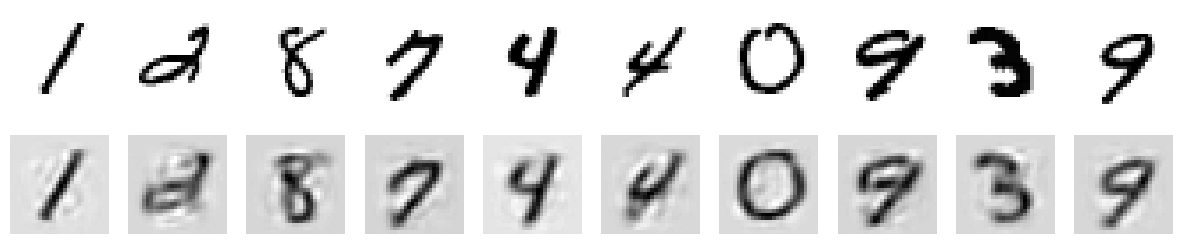

In [11]:
show_reconstructions(autoencoder)

Yay!! Look at this! We reconstruct all images using simple autoencoder! (If you not like quality images, remember your autoencoder train for few minutes, we can do better!)

### Visualizing latent space

Let's analyze this architecture. If you've noticed, the $z$ variable in the middle of the autoencoder are the input compressed data. Here, we can identify two significant aspects: data compression and dimensionality reduction (similar to PCA).

In [12]:
from sklearn.manifold import TSNE

In [13]:
X_val_latent = encoder.predict(X_val)
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D = tsne.fit_transform(X_val_latent)

157/157 [==============================] - 0s 976us/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


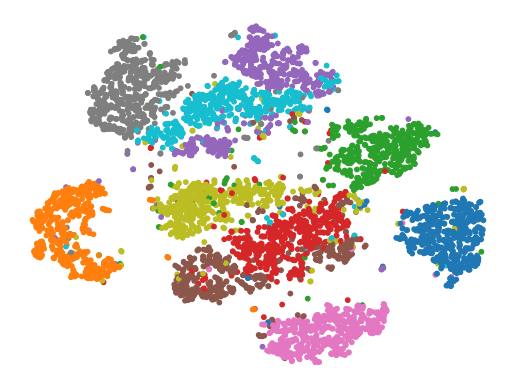

In [14]:
plt.scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_val, s=10, cmap='tab10')
plt.axis('off')
plt.show()

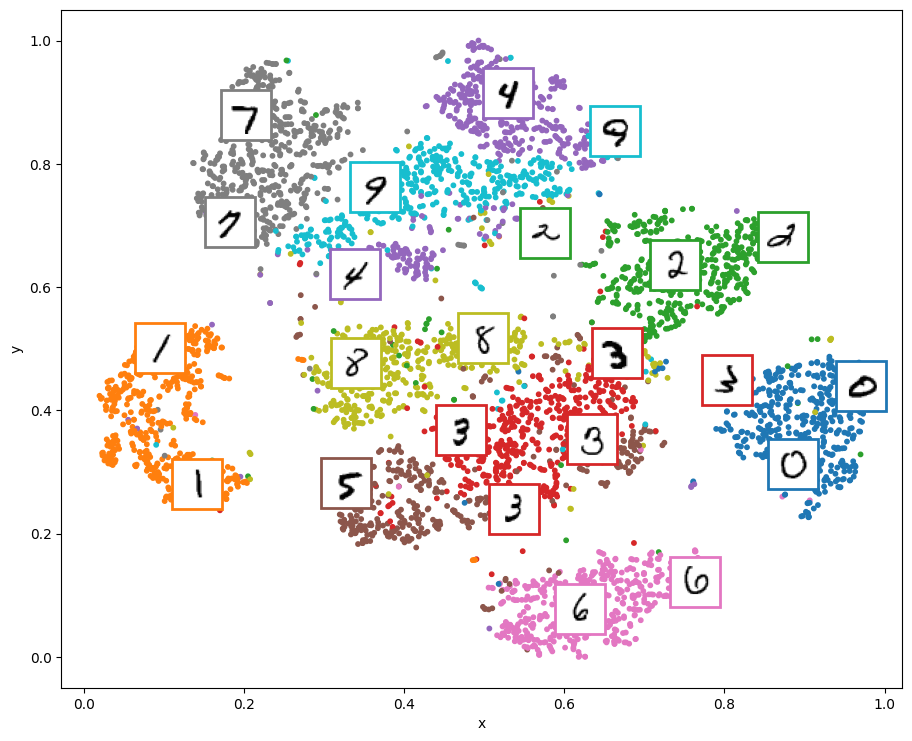

In [15]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_val_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_val, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_val[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_val[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

# plt.axis("off")
# crosshair(0.1, 0.1)
plt.xlabel('x')
plt.ylabel('y')
save_fig("mnist_visualization_plot_ae")
plt.show()

Look at this! In the **latent space** some semantic properties is conserved. Lets think about this using some cases:

- If you analyzes the number 3 cluster, you will note him closer to 8. Its happen because *3* shape is very similar to *8* if you slice him at the vertical axis. 
- The same ideia can be apply to *4* shape and *9* shape. Note both cluster are closer!

Some semantic in this case are very similar to embeddings semantics: $$f(Queen) - f(King) = f(Girl) - f(boy)$$

### Extra - Convolutional Autoencoders

Yes! We can do convolutional autoencoders too!

In [16]:
conv_encoder = keras.Sequential([
    keras.layers.Input(shape=[28, 28]),
    keras.layers.Reshape([28, 28, 1]),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation='sigmoid')
])

conv_decoder = keras.Sequential([
    keras.layers.Dense(7 * 7 * 64),
    keras.layers.Reshape([7, 7, 64]),
    keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu'),
    keras.layers.UpSampling2D(2),
    
    keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu'),
    keras.layers.UpSampling2D(2),
    
    keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')
    
])

In [17]:
conv_autoencoder = keras.Sequential([conv_encoder, conv_decoder])
conv_autoencoder.compile(loss='mse', optimizer='adam')

In [18]:
history_conv = conv_autoencoder.fit(
    X_train, X_train,
    validation_data=(X_val, X_val),
    epochs=20
)

Epoch 1/20
1719/1719 [==============================] - 15s 5ms/step - loss: 0.0156 - val_loss: 0.0096
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 8/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 9/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 10/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.00

1/1 [==============================] - 0s 157ms/step


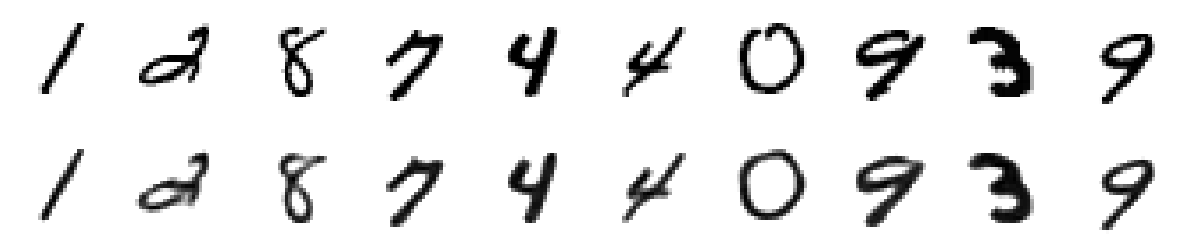

In [19]:
show_reconstructions(conv_autoencoder)

In [20]:
X_val_latent = conv_encoder.predict(X_val)
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D = tsne.fit_transform(X_val_latent)

157/157 [==============================] - 0s 1ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


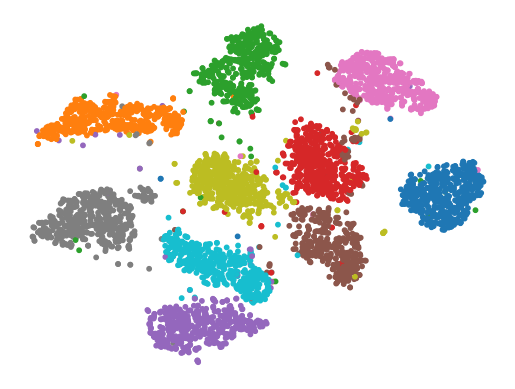

In [21]:
plt.scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_val, s=10, cmap='tab10')
plt.axis('off')
plt.show()

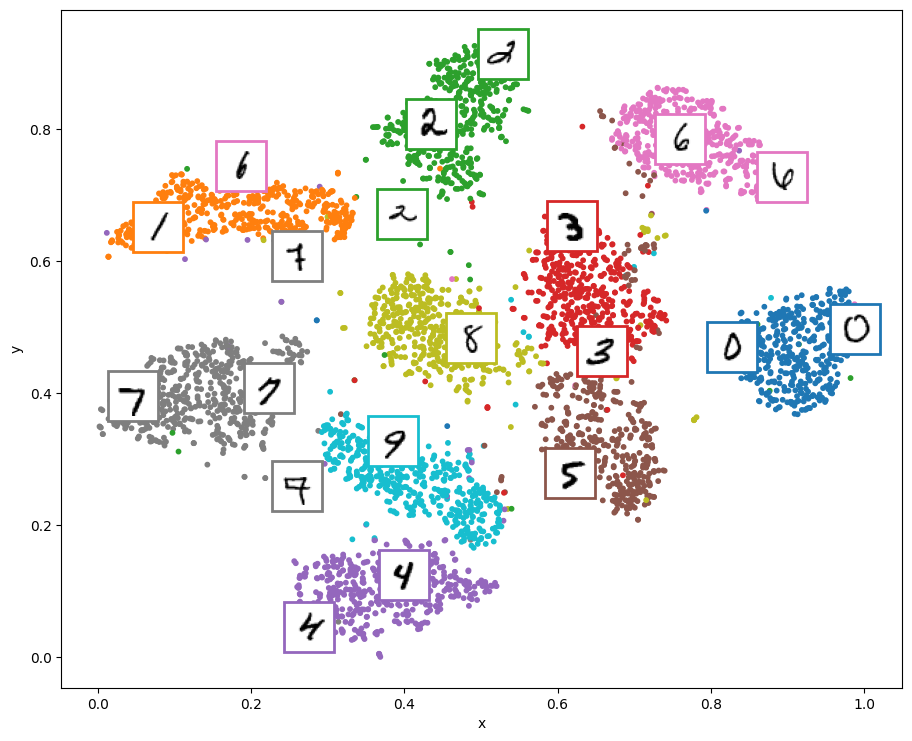

In [22]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_val_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_val, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_val[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_val[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

# plt.axis("off")
# crosshair(0.1, 0.1)
plt.xlabel('x')
plt.ylabel('y')
save_fig("mnist_visualization_plot_conv_ae")
plt.show()

Note the improve of quality! But we need to take care about the size of neural network. In many cases of Neural Network is pretty complex the system learn indentity function, and its not cool! Because we want Neural network learns deep patterns about dataset and not inditity functions!

## Divergence KL

In here, we will discuss about Kullback-Leibler Divergence. This equation works like a regularization and your principal role is aproximates distributions. In this case, we will use the following dicrete form:

$$D_{KL}(P \parallel Q) = \sum_{i} P(i) \cdot \log\left(\frac{P(i)}{Q(i)}\right)$$

After some math, we can compute to variational encoder and use in this form:

$$D_{KL}(Q(z|X) \parallel P(z)) = \frac{1}{2} \sum_{j=1}^{J} \left( 1 + \log(\sigma_j^2) - \mu_j^2 - \sigma_j^2 \right)$$


(#TODO)

## Variational Autoencoders

In [23]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean 

In [24]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [25]:
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(7 * 7 * 64)(decoder_inputs)
x = keras.layers.Reshape((7, 7, 64))(x)
x = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x)
x = keras.layers.UpSampling2D(2)(x)

x = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x)
x = keras.layers.UpSampling2D(2)(x)

outputs = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x)

# outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [26]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

In [27]:
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)

In [28]:
variational_ae.compile(loss="mse", optimizer="adam")
history_vae = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_val, X_val))

Epoch 1/25
430/430 [==============================] - 5s 9ms/step - loss: 0.0530 - val_loss: 0.0459
Epoch 2/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0437 - val_loss: 0.0418
Epoch 3/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0410 - val_loss: 0.0405
Epoch 4/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0398 - val_loss: 0.0391
Epoch 5/25
430/430 [==============================] - 4s 9ms/step - loss: 0.0390 - val_loss: 0.0384
Epoch 6/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0385 - val_loss: 0.0382
Epoch 7/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0382 - val_loss: 0.0377
Epoch 8/25
430/430 [==============================] - 4s 9ms/step - loss: 0.0379 - val_loss: 0.0379
Epoch 9/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0376 - val_loss: 0.0373
Epoch 10/25
430/430 [==============================] - 4s 8ms/step - loss: 0.0374 - val_loss: 0.0370

1/1 [==============================] - 0s 163ms/step


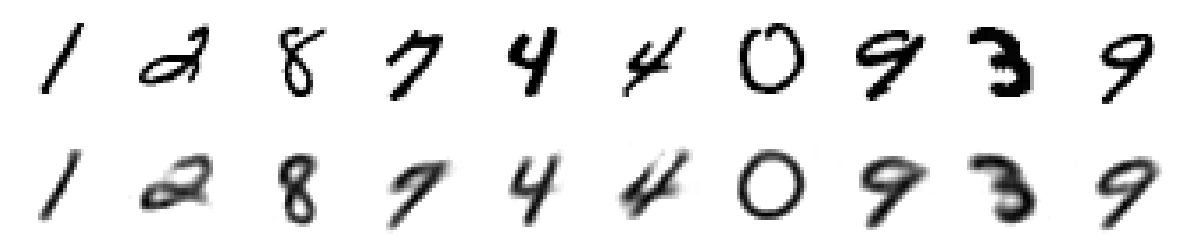

In [29]:
show_reconstructions(variational_ae)

In [30]:
_, _, X_val_latent = variational_encoder.predict(X_test)
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D = tsne.fit_transform(X_val_latent)

313/313 [==============================] - 1s 2ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


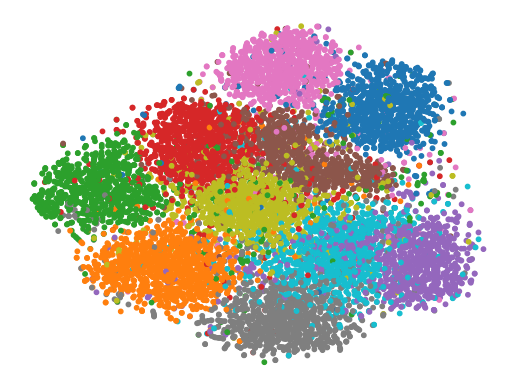

In [31]:
plt.scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
plt.axis('off')
plt.show()

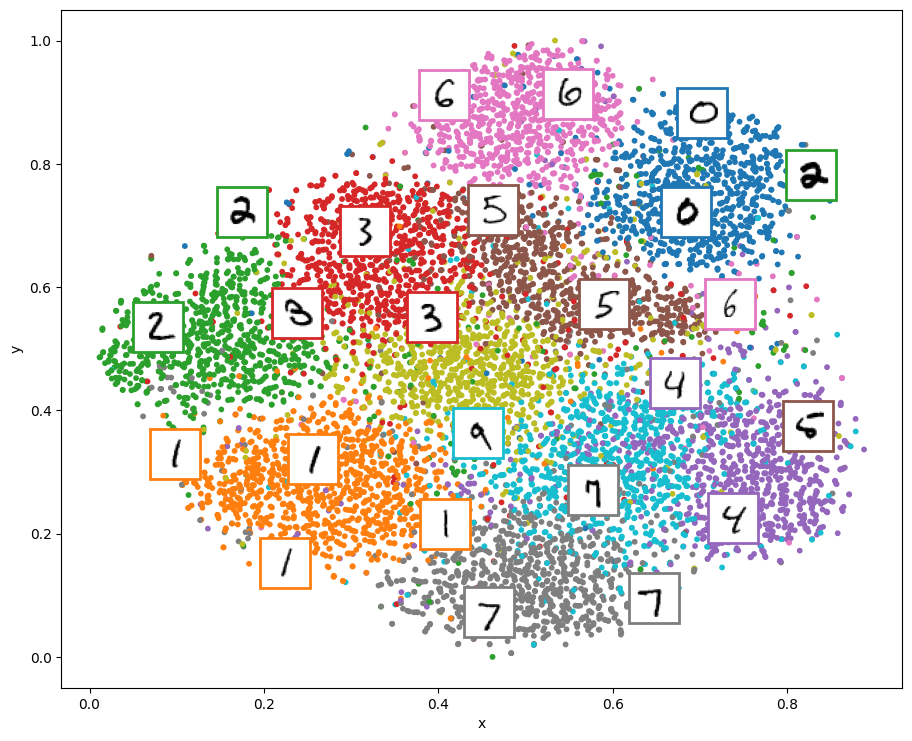

In [32]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_val_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_test, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_test[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

# plt.axis("off")
# crosshair(0.1, 0.1)
plt.xlabel('x')
plt.ylabel('y')
save_fig("mnist_visualization_plot")
plt.show()

### Extra - Classification and Reconstruction

Until here, you see autoencoders applications with only reconstruction on output. But, we can introduce another decoder and make classification together reconstruction. It will lead us to a new concept application with autoencoder: Multi-stage autoencoder. It will be explicity in a figure below:

<div style="text-align:center;">
    <img src="./images/multi_stage_autoencoder.png" alt="Example Image" style="width:600px;">
</div>

In [33]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


decoder_inputs_A = tf.keras.layers.Input(shape=[codings_size])
x_A = keras.layers.Dense(7 * 7 * 64)(decoder_inputs_A)
x_A = keras.layers.Reshape((7, 7, 64))(x_A)
x_A = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

x_A = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

outputs_A = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x_A)

variational_decoder_A = tf.keras.Model(inputs=[decoder_inputs_A], outputs=[outputs_A], name='Reconstruction')



decoder_inputs_B = tf.keras.layers.Input(shape=[codings_size])
x_B = keras.layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs_B)
x_B = keras.layers.Dense(128, activation='relu')(x_B)
x_B = keras.layers.Dense(64, activation='relu')(x_B)
x_B = keras.layers.Dense(32, activation='relu')(x_B)

outputs_B = keras.layers.Dense(10, activation='softmax')(x_B)

variational_decoder_B = tf.keras.Model(inputs=[decoder_inputs_B], outputs=[outputs_B], name='Classification')

In [34]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder_A(codings)
classifications = variational_decoder_B(codings)

variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions, classifications])

In [35]:
'''
In here, we introduce beta value (hiper-parameter) that will increase or decrease DKL magnitude. 
For while, we use beta=1 and see what happen in latent space.
'''

beta = 1.
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(beta * tf.reduce_mean(latent_loss) / 784.)

In [36]:
variational_ae.compile(
                        loss=[keras.losses.MeanSquaredError(),
                              keras.losses.SparseCategoricalCrossentropy()], 
                        optimizer=keras.optimizers.RMSprop()
                       )

history_vae = variational_ae.fit(
                                 X_train, [X_train, y_train], 
                                 epochs=25, 
                                 batch_size=128,
                                 validation_data=(X_val, [X_val, y_val])
                                 )

Epoch 1/25
430/430 [==============================] - 8s 15ms/step - loss: 0.4044 - Reconstruction_loss: 0.0530 - Classification_loss: 0.3304 - val_loss: 0.1450 - val_Reconstruction_loss: 0.0480 - val_Classification_loss: 0.0702
Epoch 2/25
430/430 [==============================] - 6s 14ms/step - loss: 0.1520 - Reconstruction_loss: 0.0454 - Classification_loss: 0.0795 - val_loss: 0.1405 - val_Reconstruction_loss: 0.0442 - val_Classification_loss: 0.0700
Epoch 3/25
430/430 [==============================] - 6s 13ms/step - loss: 0.1290 - Reconstruction_loss: 0.0432 - Classification_loss: 0.0596 - val_loss: 0.1191 - val_Reconstruction_loss: 0.0427 - val_Classification_loss: 0.0504
Epoch 4/25
430/430 [==============================] - 6s 14ms/step - loss: 0.1143 - Reconstruction_loss: 0.0418 - Classification_loss: 0.0472 - val_loss: 0.1383 - val_Reconstruction_loss: 0.0403 - val_Classification_loss: 0.0734
Epoch 5/25
430/430 [==============================] - 6s 14ms/step - loss: 0.1038 - 

In [37]:
def show_reconstructions_multi_stage(model, n_images=10):
    output = variational_ae(X_val[:n_images])
    reconstructions = output[0]
    labels_hat = tf.map_fn(fn=lambda x: x.numpy().argmax(), elems=output[1])
    labels_true = y_val[:n_images]
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        
        plt.subplot(2, n_images, 1 + image_index)
        plt.title(f'y_true={int(labels_true[image_index])}')
        plot_image(X_val[image_index])
        
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.title(f'y_hat={int(labels_hat[image_index])}')
        plot_image(reconstructions[image_index])
        

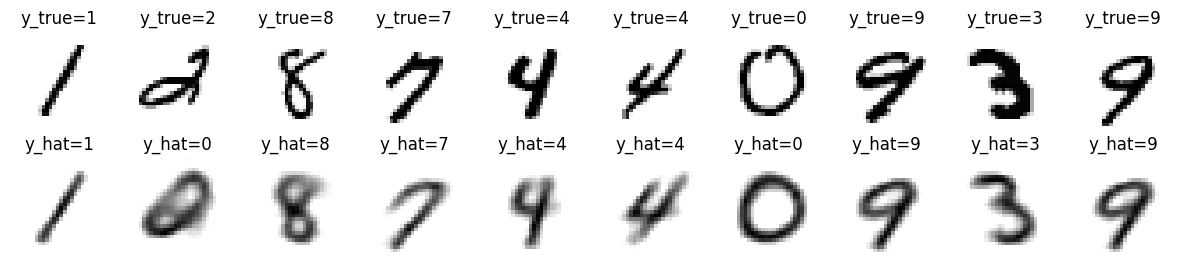

In [38]:
show_reconstructions_multi_stage(variational_ae)

### Latent Space Visualization - With Classification

In [39]:
_, _, X_val_latent_ms_beta_minus = variational_encoder.predict(X_test)
tsne_ms_beta_minus = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D_ms_beta_minus = tsne_ms_beta_minus.fit_transform(X_val_latent_ms_beta_minus)

313/313 [==============================] - 1s 2ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


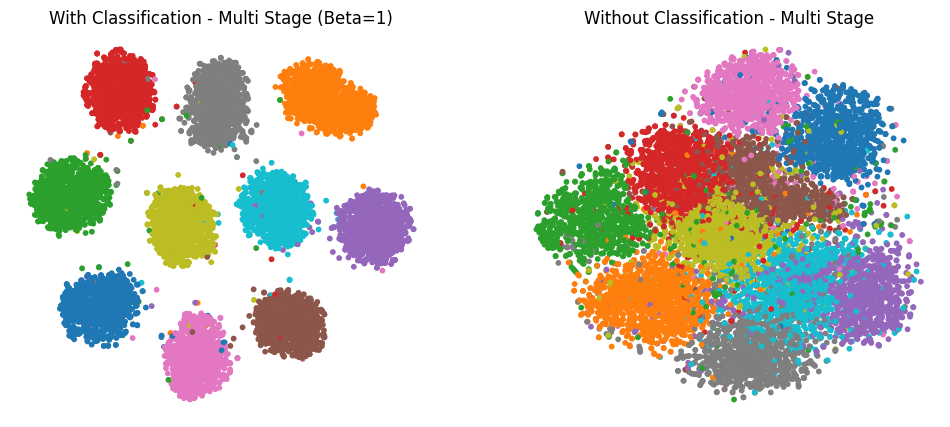

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_val_2D_ms_beta_minus[:, 0], X_val_2D_ms_beta_minus[:, 1], c=y_test, s=10, cmap='tab10')
axs[0].set_title('With Classification - Multi Stage (Beta=1)')
axs[0].axis('off')

axs[1].scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
axs[1].set_title('Without Classification - Multi Stage')
axs[1].axis('off')
plt.show()

Look at magnific picture! In both cases we compute Divergence KL and just one of them aproximate the clusters classes and in another all cluster will separated. So let think about this, why clusters in first case will separate like image? 

- It occur because encoder receive information in backpropagation by both decoders. And both gradients of loss (MSE and Cross Entropy) in outputs influence encoder to modify latent space. 

## Extra suggestion:

Lets elevate divergence KL and lets see what happen (in other words, elevate beta hiperparameter)!

In [41]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


decoder_inputs_A = tf.keras.layers.Input(shape=[codings_size])
x_A = keras.layers.Dense(7 * 7 * 64)(decoder_inputs_A)
x_A = keras.layers.Reshape((7, 7, 64))(x_A)
x_A = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

x_A = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

outputs_A = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x_A)

variational_decoder_A = tf.keras.Model(inputs=[decoder_inputs_A], outputs=[outputs_A], name='Reconstruction')



decoder_inputs_B = tf.keras.layers.Input(shape=[codings_size])
x_B = keras.layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs_B)
x_B = keras.layers.Dense(128, activation='relu')(x_B)
x_B = keras.layers.Dense(64, activation='relu')(x_B)
x_B = keras.layers.Dense(32, activation='relu')(x_B)
outputs_B = keras.layers.Dense(10, activation='softmax')(x_B)

variational_decoder_B = tf.keras.Model(inputs=[decoder_inputs_B], outputs=[outputs_B], name='Classification')

In [42]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder_A(codings)
classifications = variational_decoder_B(codings)

variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions, classifications])

In [43]:
'''
Increase beta!
'''

beta = 30
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(beta * (tf.reduce_mean(latent_loss) / 784.))

In [44]:
variational_ae.compile(
                        loss=[keras.losses.MeanSquaredError(),
                              keras.losses.SparseCategoricalCrossentropy()], 
                        optimizer=keras.optimizers.RMSprop()
                       )

history_vae = variational_ae.fit(
                                 X_train, [X_train, y_train], 
                                 epochs=25, 
                                 batch_size=128,
                                 validation_data=(X_val, [X_val, y_val])
                                 )

Epoch 1/25
430/430 [==============================] - 8s 15ms/step - loss: 0.7775 - Reconstruction_loss: 0.0568 - Classification_loss: 0.4809 - val_loss: 0.4563 - val_Reconstruction_loss: 0.0524 - val_Classification_loss: 0.1568
Epoch 2/25
430/430 [==============================] - 6s 15ms/step - loss: 0.4207 - Reconstruction_loss: 0.0541 - Classification_loss: 0.1408 - val_loss: 0.3746 - val_Reconstruction_loss: 0.0524 - val_Classification_loss: 0.1150
Epoch 3/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3621 - Reconstruction_loss: 0.0540 - Classification_loss: 0.1092 - val_loss: 0.3682 - val_Reconstruction_loss: 0.0523 - val_Classification_loss: 0.1261
Epoch 4/25
430/430 [==============================] - 6s 15ms/step - loss: 0.3325 - Reconstruction_loss: 0.0539 - Classification_loss: 0.0910 - val_loss: 0.3284 - val_Reconstruction_loss: 0.0523 - val_Classification_loss: 0.0944
Epoch 5/25
430/430 [==============================] - 6s 15ms/step - loss: 0.3134 - 

In [45]:
from sklearn.manifold import TSNE
_, _, X_val_latent_ms_beta_plus = variational_encoder.predict(X_test)
tsne_ms_beta_plus = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D_ms_beta_plus = tsne_ms_beta_plus.fit_transform(X_val_latent_ms_beta_plus)

313/313 [==============================] - 1s 2ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


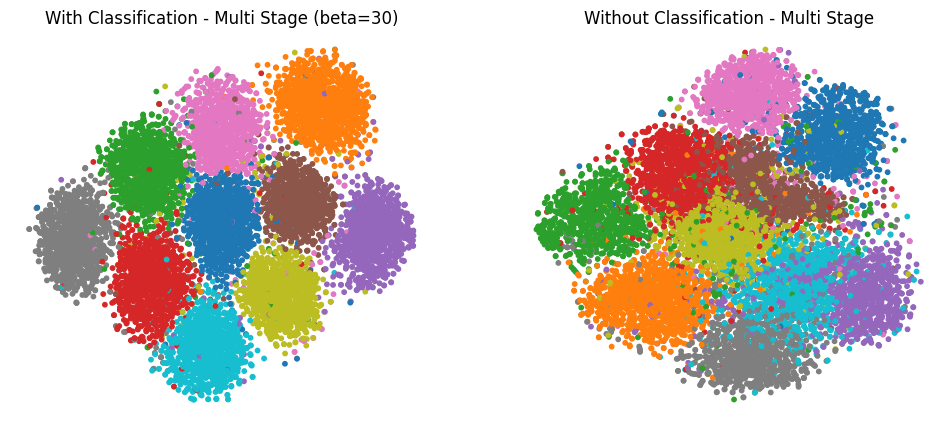

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_val_2D_ms_beta_plus[:, 0], X_val_2D_ms_beta_plus[:, 1], c=y_test, s=10, cmap='tab10')
axs[0].set_title('With Classification - Multi Stage (beta=30)')
axs[0].axis('off')

axs[1].scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
axs[1].set_title('Without Classification - Multi Stage')
axs[1].axis('off')
plt.show()

Look what happen! Latent space was modified because we increase hiperparameter. In this case, all clusters are closer. So, lets see three cases together: 

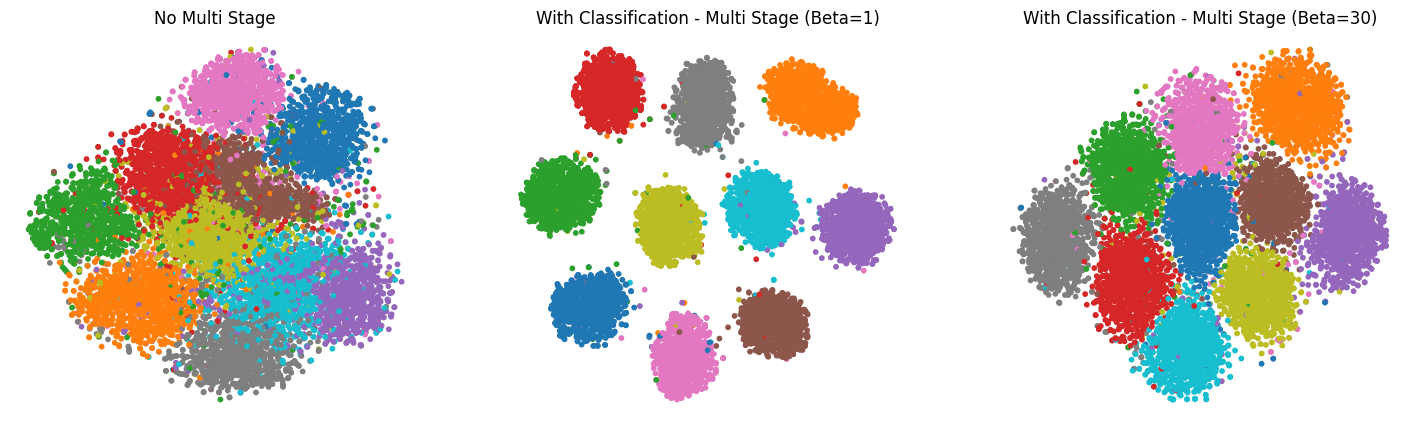

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
axs[0].set_title('No Multi Stage')
axs[0].axis('off')

axs[1].scatter(X_val_2D_ms_beta_minus[:, 0], X_val_2D_ms_beta_minus[:, 1], c=y_test, s=10, cmap='tab10')
axs[1].set_title('With Classification - Multi Stage (Beta=1)')
axs[1].axis('off')

axs[2].scatter(X_val_2D_ms_beta_plus[:, 0], X_val_2D_ms_beta_plus[:, 1], c=y_test, s=10, cmap='tab10')
axs[2].set_title('With Classification - Multi Stage (Beta=30)')
axs[2].axis('off')
plt.show()

## Last Suggestion:

Try to increase beta value again in KL divergence and see all clusters closer more and more.

## Confusion matrix with classifier

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [49]:
y_test_hat = tf.map_fn(fn=lambda x: x.numpy().argmax(), elems=variational_ae.predict(X_test)[1]).numpy()

313/313 [==============================] - 1s 3ms/step


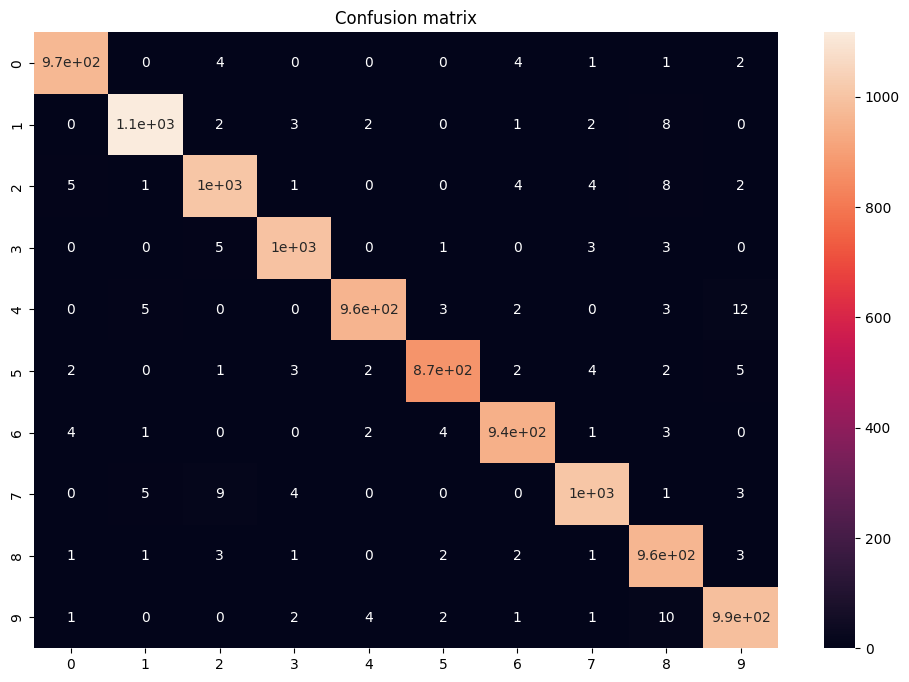

In [50]:
matrix = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(12, 8))
plt.title('Confusion matrix')
sns.heatmap(matrix, annot=True);

In [51]:
accuracy = accuracy_score(y_test, y_test_hat)
precision = precision_score(y_test, y_test_hat, average='macro')
recall = recall_score(y_test, y_test_hat, average='macro')
f1score = f1_score(y_test, y_test_hat, average='macro')

print(f"Accuracy = {accuracy.round(5)}")
print(f"Precision = {precision.round(5)}")
print(f"Recall = {recall.round(5)}")
print(f"F1 Score = {f1score.round(5)}")

Accuracy = 0.9815
Precision = 0.98153
Recall = 0.98145
F1 Score = 0.98146


## Analytic Geometry

The great idea is: How can I walk from one class $i$ to another class $j$. In this case, lets walk from number **1** to number **2**


### Centroid

First, we need to find centroid (or center of mass) of each classes in $z$ space (Latent Space). For this, before lets train again VAE with high $\beta$.

In [52]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


decoder_inputs_A = tf.keras.layers.Input(shape=[codings_size])
x_A = keras.layers.Dense(7 * 7 * 64)(decoder_inputs_A)
x_A = keras.layers.Reshape((7, 7, 64))(x_A)
x_A = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

x_A = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

outputs_A = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x_A)

variational_decoder_A = tf.keras.Model(inputs=[decoder_inputs_A], outputs=[outputs_A], name='Reconstruction')



decoder_inputs_B = tf.keras.layers.Input(shape=[codings_size])
x_B = keras.layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs_B)
x_B = keras.layers.Dense(128, activation='relu')(x_B)
x_B = keras.layers.Dense(64, activation='relu')(x_B)
x_B = keras.layers.Dense(32, activation='relu')(x_B)
outputs_B = keras.layers.Dense(10, activation='softmax')(x_B)

variational_decoder_B = tf.keras.Model(inputs=[decoder_inputs_B], outputs=[outputs_B], name='Classification')

In [53]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder_A(codings)
classifications = variational_decoder_B(codings)

variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions, classifications])

In [54]:
'''
Increase beta!
'''

beta = 35
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(beta * (tf.reduce_mean(latent_loss) / 784.))

In [55]:
variational_ae.compile(
                        loss=[keras.losses.MeanSquaredError(),
                              keras.losses.SparseCategoricalCrossentropy()], 
                        optimizer=keras.optimizers.RMSprop()
                       )

history_vae = variational_ae.fit(
                                 X_train, [X_train, y_train], 
                                 epochs=25, 
                                 batch_size=128,
                                 validation_data=(X_val, [X_val, y_val])
                                 )

Epoch 1/25
430/430 [==============================] - 8s 14ms/step - loss: 0.7683 - Reconstruction_loss: 0.0564 - Classification_loss: 0.4470 - val_loss: 0.4514 - val_Reconstruction_loss: 0.0525 - val_Classification_loss: 0.1317
Epoch 2/25
430/430 [==============================] - 6s 13ms/step - loss: 0.4336 - Reconstruction_loss: 0.0541 - Classification_loss: 0.1411 - val_loss: 0.4021 - val_Reconstruction_loss: 0.0525 - val_Classification_loss: 0.1237
Epoch 3/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3826 - Reconstruction_loss: 0.0540 - Classification_loss: 0.1123 - val_loss: 0.3835 - val_Reconstruction_loss: 0.0526 - val_Classification_loss: 0.1200
Epoch 4/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3536 - Reconstruction_loss: 0.0541 - Classification_loss: 0.0939 - val_loss: 0.3604 - val_Reconstruction_loss: 0.0527 - val_Classification_loss: 0.1084
Epoch 5/25
430/430 [==============================] - 6s 14ms/step - loss: 0.3388 - 

In [56]:
_, _, X_val_latent_ms_beta_high = variational_encoder.predict(X_test)
tsne_ms_beta_high = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D_ms_beta_high = tsne_ms_beta_high.fit_transform(X_val_latent_ms_beta_high)

313/313 [==============================] - 1s 2ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


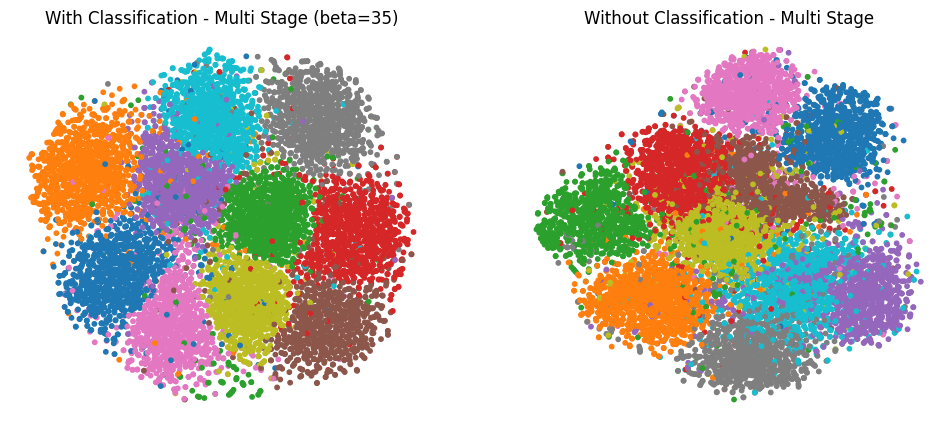

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_val_2D_ms_beta_high[:, 0], X_val_2D_ms_beta_high[:, 1], c=y_test, s=10, cmap='tab10')
axs[0].set_title(f'With Classification - Multi Stage (beta={beta})')
axs[0].axis('off')

axs[1].scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
axs[1].set_title('Without Classification - Multi Stage')
axs[1].axis('off')
plt.show()

In [58]:
# X_val_latent_ms_beta_high

In [59]:
df = pd.concat([pd.DataFrame(X_val_latent_ms_beta_high), pd.DataFrame(y_test, columns=['label'])], axis=1)

In [60]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,-0.216493,-1.207152,1.272027,-0.776861,1.690953,1.990140,-0.798669,-0.166118,0.813484,1.371452,0.217954,-1.917900,-1.050023,-1.144639,-0.349373,1.107557,7
1,-0.656488,-0.450727,-0.497993,-0.037057,-0.389491,0.040014,0.405543,-0.102693,-0.417773,-1.659503,0.657088,-0.739425,-0.309214,1.682143,1.432521,0.591364,2
2,1.770334,1.113789,1.780979,0.638798,-2.801359,0.271443,-0.841827,0.846116,1.076213,0.482921,1.583891,1.120568,-0.755236,0.351833,-0.095714,1.976991,1
3,1.368843,1.470699,0.350428,0.087540,-0.978264,-1.367030,-1.009953,0.831373,1.108020,0.641074,-1.226315,0.474071,0.180638,-0.015935,-1.406506,-0.538101,0
4,-1.355036,-0.178244,0.834231,-0.636724,-0.609157,-1.157864,-1.353748,-0.714606,0.065739,-0.452062,0.285998,0.485329,-1.078509,1.079270,-0.061074,1.001077,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.025597,-1.323445,-0.713408,0.657198,-0.589611,0.051352,-0.246630,-0.220304,1.896321,-1.483554,-0.688074,0.313140,-1.707970,-0.030660,-1.491573,0.255795,2
9996,0.436158,-1.723729,-1.172109,0.530063,-0.744703,-1.446707,-0.000410,2.154104,0.038974,0.085721,-0.129514,-1.317917,0.362676,-0.612109,0.354166,-0.404236,3
9997,-1.307176,0.165967,-0.760647,0.113526,-1.289406,-0.578384,0.132519,0.775505,0.360305,-0.153217,0.623690,-0.981525,-0.130201,-0.196797,-0.846187,0.557429,4
9998,0.054912,-0.405713,-0.393531,1.330085,1.019101,1.838035,1.142196,-0.437503,0.771862,0.140343,0.449362,1.044759,1.415650,-0.632540,-0.508763,-2.675768,5


In [61]:
def get_center_of_mass(df):
    cms = []
    labels = df.label.unique()
    for label in sorted(labels):
        cm = df[df.label == label][df.columns[:-1]].sum() / df[df.label == label].shape[0]
        cms.append(cm.values)
    return cms

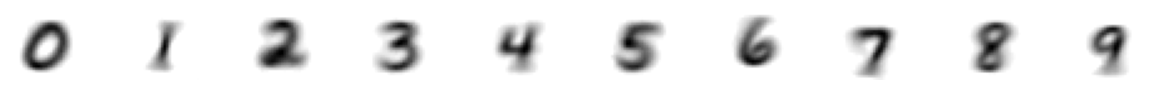

In [62]:
cms = get_center_of_mass(df)
imgs_cm = [variational_decoder_A(cms[i].reshape(1, -1))[0] for i in range(10)]
plot_grid_images(imgs_cm)

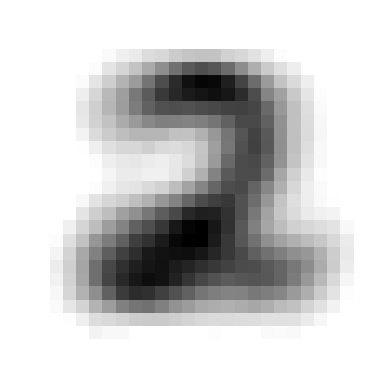

In [63]:
plot_image(variational_decoder_A(cms[2].reshape(1, -1))[0])

In [64]:
import time
import cv2

In [65]:
many = []
for i in range(10):#range(4, len(cms) - 5):
    A, B = cms[i - 1].copy(), cms[i].copy()
    versor = (B - A) / np.linalg.norm(B - A)
    d = np.linspace(0, np.linalg.norm(B - A), 100)
    for i in range(100):
        row = A + d[i] * versor
        many.append(row.copy())

many = tf.convert_to_tensor(tf.squeeze(np.array(many)))
images = variational_decoder_A(many).numpy()
images_converted = []

for x in images:
    new_x = ((x - x.min()) / (x - x.min()).max()) * 255
    new_x = new_x.astype(np.uint8)
    images_converted.append(new_x)

images_converted = np.array(images_converted)
# np.array([(img * 255).astype(np.int32) for img in images])

In [66]:
frameSize = (28, 28)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)
# video=cv2.VideoWriter('video.avi',-1,1,(28,28))

In [67]:
def plot_multiple_images_cv2(images, n_cols=None):
    # frames = []
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)
    #plt.figure(figsize=(n_cols, n_rows))
    print(images.shape)
    for index, image in enumerate(images):
        image = cv2.resize(image, (28, 28)) 
        cv2.imshow('frame', image)
        rgb_image = np.zeros((28, 28, 3), dtype=np.uint8)
        rgb_image[:, :, 0] = image  # R channel
        rgb_image[:, :, 1] = image  # G channel
        rgb_image[:, :, 2] = image  # B channel
        out.write(rgb_image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    out.release()
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [68]:
frames = plot_multiple_images_cv2(images=images_converted)

(1000, 28, 28)


In [69]:
many

<tf.Tensor: shape=(1000, 16), dtype=float32, numpy=
array([[-0.4998603 ,  0.12445142, -0.03854767, ..., -0.04106904,
         0.00253406,  0.04091976],
       [-0.49420163,  0.1408611 , -0.03856157, ..., -0.04045049,
         0.0020505 ,  0.03571765],
       [-0.48854294,  0.15727077, -0.03857547, ..., -0.03983194,
         0.00156694,  0.03051554],
       ...,
       [-0.4654672 ,  0.12270355, -0.03769805, ..., -0.04169353,
         0.00161107,  0.03682125],
       [-0.48266375,  0.12357749, -0.03812286, ..., -0.04138128,
         0.00207257,  0.03887051],
       [-0.4998603 ,  0.12445143, -0.03854767, ..., -0.04106904,
         0.00253407,  0.04091977]], dtype=float32)>

In [70]:
images_converted.shape

(1000, 28, 28, 1)

In [71]:
frames = []
for i in range(len(images_converted)):
    image = images_converted[i].copy()
    image = cv2.resize(image, (28, 28)) 
    rgb_image = np.zeros((28, 28, 3), dtype=np.uint8)
    rgb_image[:, :, 0] = image  # R channel
    rgb_image[:, :, 1] = image  # G channel
    rgb_image[:, :, 2] = image  # B channel
    frames.append(rgb_image)
frames = np.array(frames)

In [72]:
import imageio
# Convert to gif using the imageio.mimsave method
imageio.mimsave('output_gif.gif', frames, fps=60)

## Transition between two classes

We now have all the interpolated images between $0 \rightarrow 1$, $1 \rightarrow 2$, $2 \rightarrow 3$, and so on. Remember: We calculate centroids for each class and formulate the equation of a straight line,

$$\vec r(d) = \vec o + d \hat t$$

In the first transition, we use $\vec{o} = \vec{c}(0)$ and $\hat{t} = \frac{\vec{c}(1) - \vec{c}(0)}{||\vec{c}(1) - \vec{c}(0)||_2}$, where $\vec{c}(x)$ is the centroid of the number $x$ in the latent space. We simply march along the equation of a straight line, pick up some points on the line, put them into the decoder, and voilà! You can see this technique in the image below:

<div style="text-align:center;">
    <img src="images/z_space_to_frames.png" alt="Example Image" style="width:720px;">
</div>
Then, using the idea explained before, we can construct a gif with connections between each frame. We will witness the smooth transition between classes in our dataset. See the gif below:

<div style="text-align:center;">
    <img src="output_gif_regular.gif" alt="Example Image" style="width:100px;">
</div>
This gif shows us a beautiful animation that interpolates images that are not in the original dataset.

## Quality Transition

Another thing we need to discuss about multi-stage VAE is: There is difference in transition between two architecture?

Let's see and compare!

In [73]:
def myMSE(y_true, y_pred, gamma=5.5):
    squared_difference = tf.square(y_true - y_pred)
    return gamma * tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

In [74]:
# Regular VAE
codings_size = 16
inputs_regular = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs_regular)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)

codings_mean_regular = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var_regular = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings_regular = Sampling()([codings_mean_regular, codings_log_var_regular])
variational_encoder_regular = tf.keras.Model(
    inputs=[inputs_regular], outputs=[codings_mean_regular, codings_log_var_regular, codings_regular])

decoder_inputs_regular = tf.keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(7 * 7 * 64)(decoder_inputs_regular)
x = keras.layers.Reshape((7, 7, 64))(x)
x = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x)
x = keras.layers.UpSampling2D(2)(x)

x = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x)
x = keras.layers.UpSampling2D(2)(x)

outputs_regular = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x)

# outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder_regular = tf.keras.Model(inputs=[decoder_inputs_regular], outputs=[outputs_regular])

_, _, codings_regular = variational_encoder_regular(inputs_regular)
reconstructions_regular = variational_decoder_regular(codings_regular)
variational_ae_regular = tf.keras.Model(inputs=[inputs_regular], outputs=[reconstructions_regular])

latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var_regular - tf.exp(codings_log_var_regular) - tf.square(codings_mean_regular),
    axis=-1)
variational_ae_regular.add_loss(tf.reduce_mean(latent_loss) / 784.)

In [75]:
variational_ae_regular.compile(loss=myMSE, optimizer="adam")
history_vae_regular = variational_ae_regular.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_val, X_val))

Epoch 1/25
430/430 [==============================] - 5s 9ms/step - loss: 0.2100 - val_loss: 0.1508
Epoch 2/25
430/430 [==============================] - 3s 8ms/step - loss: 0.1390 - val_loss: 0.1320
Epoch 3/25
430/430 [==============================] - 4s 8ms/step - loss: 0.1260 - val_loss: 0.1222
Epoch 4/25
430/430 [==============================] - 3s 8ms/step - loss: 0.1192 - val_loss: 0.1167
Epoch 5/25
430/430 [==============================] - 4s 8ms/step - loss: 0.1152 - val_loss: 0.1130
Epoch 6/25
430/430 [==============================] - 3s 8ms/step - loss: 0.1124 - val_loss: 0.1161
Epoch 7/25
430/430 [==============================] - 4s 8ms/step - loss: 0.1103 - val_loss: 0.1086
Epoch 8/25
430/430 [==============================] - 3s 8ms/step - loss: 0.1087 - val_loss: 0.1085
Epoch 9/25
430/430 [==============================] - 3s 8ms/step - loss: 0.1068 - val_loss: 0.1064
Epoch 10/25
430/430 [==============================] - 3s 7ms/step - loss: 0.1057 - val_loss: 0.1056

In [76]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


decoder_inputs_A = tf.keras.layers.Input(shape=[codings_size])
x_A = keras.layers.Dense(7 * 7 * 64)(decoder_inputs_A)
x_A = keras.layers.Reshape((7, 7, 64))(x_A)
x_A = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

x_A = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

outputs_A = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x_A)

variational_decoder_A = tf.keras.Model(inputs=[decoder_inputs_A], outputs=[outputs_A], name='Reconstruction')



decoder_inputs_B = tf.keras.layers.Input(shape=[codings_size])
x_B = keras.layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs_B)
x_B = keras.layers.Dense(128, activation='relu')(x_B)
x_B = keras.layers.Dense(64, activation='relu')(x_B)
x_B = keras.layers.Dense(32, activation='relu')(x_B)
outputs_B = keras.layers.Dense(10, activation='softmax')(x_B)

variational_decoder_B = tf.keras.Model(inputs=[decoder_inputs_B], outputs=[outputs_B], name='Classification')

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder_A(codings)
classifications = variational_decoder_B(codings)

variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions, classifications])

'''
Increase beta!
'''

beta = 35
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(beta * (tf.reduce_mean(latent_loss) / 784.))



In [77]:
variational_ae.compile(
                        loss=[myMSE,
                              keras.losses.SparseCategoricalCrossentropy()], 
                        optimizer=keras.optimizers.RMSprop()
                       )

history_vae = variational_ae.fit(
                                 X_train, [X_train, y_train], 
                                 epochs=25, 
                                 batch_size=128,
                                 validation_data=(X_val, [X_val, y_val])
                                 )

Epoch 1/25
430/430 [==============================] - 7s 13ms/step - loss: 1.1071 - Reconstruction_loss: 0.3104 - Classification_loss: 0.5289 - val_loss: 0.7331 - val_Reconstruction_loss: 0.2847 - val_Classification_loss: 0.1735
Epoch 2/25
430/430 [==============================] - 6s 13ms/step - loss: 0.6899 - Reconstruction_loss: 0.2927 - Classification_loss: 0.1452 - val_loss: 0.6383 - val_Reconstruction_loss: 0.2834 - val_Classification_loss: 0.1206
Epoch 3/25
430/430 [==============================] - 5s 12ms/step - loss: 0.6305 - Reconstruction_loss: 0.2897 - Classification_loss: 0.1102 - val_loss: 0.6029 - val_Reconstruction_loss: 0.2806 - val_Classification_loss: 0.1012
Epoch 4/25
430/430 [==============================] - 5s 12ms/step - loss: 0.6031 - Reconstruction_loss: 0.2882 - Classification_loss: 0.0926 - val_loss: 0.6241 - val_Reconstruction_loss: 0.2816 - val_Classification_loss: 0.1335
Epoch 5/25
430/430 [==============================] - 5s 12ms/step - loss: 0.5868 - 

In [78]:
_, _, X_val_regular = variational_encoder_regular.predict(X_test)
_, _, X_val_multi_stage = variational_encoder.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [79]:
df_regular = pd.concat([pd.DataFrame(X_val_regular), pd.DataFrame(y_test, columns=['label'])], axis=1)
df_multi_stage = pd.concat([pd.DataFrame(X_val_multi_stage), pd.DataFrame(y_test, columns=['label'])], axis=1)

In [80]:
cms_regular = get_center_of_mass(df_regular)
cms_multi_stage = get_center_of_mass(df_multi_stage)

In [81]:
imgs_cm_regular = [variational_decoder_regular(cms_regular[i].reshape(1, -1))[0] for i in range(10)]
imgs_cm_multi_stage = [variational_decoder_A(cms_multi_stage[i].reshape(1, -1))[0] for i in range(10)]

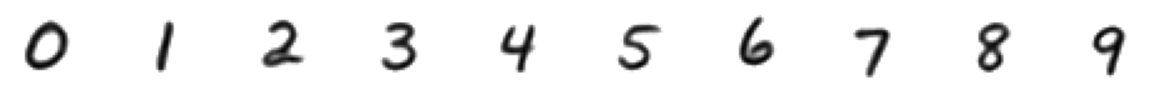

In [82]:
plot_grid_images(imgs_cm_regular)

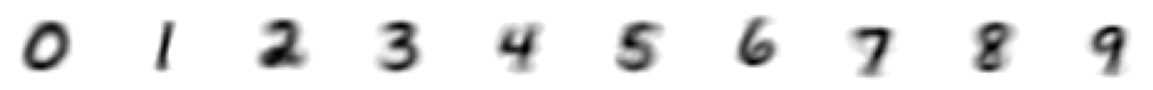

In [83]:
plot_grid_images(imgs_cm_multi_stage)

In [84]:
import cv2

In [85]:
many = []
for i in range(10):#range(4, len(cms) - 5):
    A, B = cms_regular[i - 1].copy(), cms_regular[i].copy()
    versor = (B - A) / np.linalg.norm(B - A)
    d = np.linspace(0, np.linalg.norm(B - A), 100)
    for i in range(100):
        row = A + d[i] * versor
        many.append(row.copy())

many = tf.convert_to_tensor(tf.squeeze(np.array(many)))
images = variational_decoder_regular(many).numpy()
images_converted_regular = []

for x in images:
    new_x = ((x - x.min()) / (x - x.min()).max()) * 255
    new_x = new_x.astype(np.uint8)
    images_converted_regular.append(new_x)

images_converted_regular = np.array(images_converted_regular)
# np.array([(img * 255).astype(np.int32) for img in images])

frames_regular = []
for i in range(len(images_converted_regular)):
    image = images_converted_regular[i].copy()
    image = cv2.resize(image, (28, 28)) 
    rgb_image = np.zeros((28, 28, 3), dtype=np.uint8)
    rgb_image[:, :, 0] = image  # R channel
    rgb_image[:, :, 1] = image  # G channel
    rgb_image[:, :, 2] = image  # B channel
    frames_regular.append(rgb_image)
frames_regular = np.array(frames_regular)

In [86]:
many = []
for i in range(10):#range(4, len(cms) - 5):
    A, B = cms_multi_stage[i - 1].copy(), cms_multi_stage[i].copy()
    versor = (B - A) / np.linalg.norm(B - A)
    d = np.linspace(0, np.linalg.norm(B - A), 100)
    for i in range(100):
        row = A + d[i] * versor
        many.append(row.copy())

many = tf.convert_to_tensor(tf.squeeze(np.array(many)))
images = variational_decoder_A(many).numpy()
images_converted_multi_stage = []

for x in images:
    new_x = ((x - x.min()) / (x - x.min()).max()) * 255
    new_x = new_x.astype(np.uint8)
    images_converted_multi_stage.append(new_x)

images_converted_multi_stage = np.array(images_converted_multi_stage)
# np.array([(img * 255).astype(np.int32) for img in images])

frames_multi_stage = []
for i in range(len(images_converted_multi_stage)):
    image = images_converted_multi_stage[i].copy()
    image = cv2.resize(image, (28, 28)) 
    rgb_image = np.zeros((28, 28, 3), dtype=np.uint8)
    rgb_image[:, :, 0] = image  # R channel
    rgb_image[:, :, 1] = image  # G channel
    rgb_image[:, :, 2] = image  # B channel
    frames_multi_stage.append(rgb_image)
frames_multi_stage = np.array(frames_multi_stage)

In [87]:
import imageio
# Convert to gif using the imageio.mimsave method
imageio.mimsave('output_gif_regular.gif', frames_regular, fps=60)

# Convert to gif using the imageio.mimsave method
imageio.mimsave('output_gif_multi_stage.gif', frames_multi_stage, fps=60)


<div style="text-align:center;">
    <img src="output_gif_regular.gif" alt="Example Image" style="width:100px;">
</div>


<div style="text-align:center;">
    <img src="output_gif_multi_stage.gif" alt="Example Image" style="width:100px;">
</div>

## Conclusions:

- There are many differents between two architetures. We reach the objective of make transitions two classes without pass into another, with multi-stage VAE we can see that. However, the image quality was decrease, probabily because we increase too much $\beta$ in KL divergence. 

- Another observed effect is a little bit less capability of create new instances with diversity under our dataset.